# Breast Cancer Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("breast_cancer_prediction.csv")

In [3]:
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# shape of dataset
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isna().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.describe()

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
#replace Malign with 1 and benign with 0
df=df.replace(to_replace='B',value=0)
df=df.replace(to_replace='M',value=1)

<AxesSubplot:>

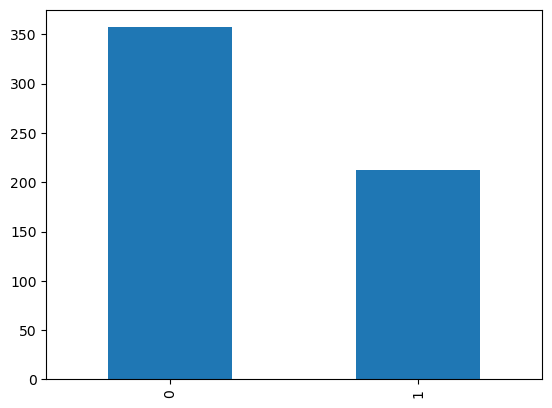

In [10]:
df['diagnosis'].value_counts().plot(kind='bar') 

In [26]:
df['diagnosis'].value_counts()/len(df['diagnosis'])*100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

In [11]:
df.drop(['id'],axis=1,inplace=True)

In [12]:
df.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df.corr()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.417232,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
Radius_mean,0.730029,1.000000,0.326716,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Texture_mean,0.417232,0.326716,1.000000,0.332231,0.324149,-0.024737,0.235863,0.302324,0.294307,0.071390,...,0.355463,0.911275,0.360485,0.346576,0.076875,0.277075,0.300731,0.297040,0.104590,0.119644
perimeter_mean,0.742636,0.997855,0.332231,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.324149,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.024737,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.235863,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302324,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.294307,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071390,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [14]:
df=df[['Texture_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean','radius_se','perimeter_se','area_se','concave points_se','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','symmetry_worst','diagnosis']]

In [15]:
df.head()

,Texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,concave points_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,diagnosis
0,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,0.01587,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.4601,1
1,21.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,0.01340,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.2750,1
2,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,0.02058,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.3613,1
3,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,0.01867,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.6638,1
4,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,0.01885,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.2364,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=df[['Texture_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_mean','radius_se','perimeter_se','area_se','concave points_se','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','symmetry_worst']]
y=df['diagnosis']

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
y_test_pred = lr.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9846153846153847
Testing Accuracy: 0.9736842105263158


In [21]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9385964912280702


In [22]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9649122807017544


In [23]:
#SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')  # You can also try other kernels like 'rbf'
svm_classifier.fit(X_train, Y_train)
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
y_test_pred = svm_classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158


In [24]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, Y_train)
y_train_pred = xgb_classifier.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
y_test_pred = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9736842105263158


After applying different classification models we conclude that,
Logistic Regression and Support Vector machine classification algorithm gives best results on training and testing data than Decision Tree, Random forest, Xgboost.

Decision Tree and Random forest shows some Overfitting.